## Importing all the necessary Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [6]:
comments = pd.read_csv("/content/UScomments.csv", error_bad_lines = False)


<ipython-input-6-5c700c805a65>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv("/content/UScomments.csv", error_bad_lines = False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-6-5c700c805a65>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("/content/UScomments.csv", error_bad_lines = False)


## Looking at the structure of the DataFrame

In [7]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Lets look at the shape of the DataFrame

In [19]:
comments.shape

(691375, 4)

## Looking for Null values in the DataFrame

In [8]:
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [9]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

## Dropping all the Null values and updating the dataframe

In [10]:
comments.dropna(inplace =True)

In [11]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Perform Sentiment Analysis

### textblob is package use to perfrom sentiment analysis in the real world which generate a polarity value between -1 and 1, where value closer to -1 indicate a negative sentiment, value closer to 0 indicate a neutral sentiment and value closer to 1 indicates a positive sentiment

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### Lets have a look at the sentiment and polarity value

In [16]:
c1 = comments["comment_text"][0]
c1

"Logan Paul it's yo big day ‼️‼️‼️"

In [17]:
TextBlob(c1).sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [18]:
TextBlob(c1).sentiment.polarity

0.0

## Now lets create a column of polarity for every commnet_text

In [22]:
polarity = []

for comment in comments["comment_text"]:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [23]:
len(polarity)

691375

In [24]:
comments["polarity"] = polarity
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [61]:
positive_comments = comments[comments["polarity"] == 1]
total_positive_comments = len(positive_comments)

negative_comments = comments[comments["polarity"] == -1]
total_negative_comments = len(negative_comments)

neutral_comments = comments[comments["polarity"] == 0]
total_neutral_comments = len(neutral_comments)

print(f"Total Positive Comments are: {total_positive_comments}")
print(f"Total Negative Comments are: {total_negative_comments}")
print(f"Total Neutral Comments are: {total_neutral_comments}")

Total Positive Comments are: 19390
Total Negative Comments are: 3508
Total Neutral Comments are: 284425


## Word Cloud Analysis

### A graphical representation of text analysis to understand the most important words

In [30]:
positive_words = comments[comments["polarity"] == 1]
positive_words.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [31]:
negative_words = comments[comments["polarity"] == -1]
negative_words.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [33]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud , STOPWORDS

### STOPWORDS are words that doesn't have much of an importance.

### It is a general list of words thet you don't need.

In [37]:
stopwords = set(STOPWORDS)
# stopwords

In [39]:
positive_string = ''.join(positive_words["comment_text"])
positive_string

"yu are the bestPower is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :DThis is pricelessSummed up perfectlyThis is awesome. 1:20 XDDDDDDDDDBEST MOVIE EVER!!!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The greatest movie about the greatest movie.It's Harry guys he's Spiderman best friendBest remake ever!Great review!awesome vlogSubscribe to me if Roman Atwood is the best youtuberI was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever.The best part of the movie was the creditsDO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome.Please say uncle t

In [41]:
wordcloud_positive = WordCloud(stopwords = stopwords).generate(positive_string)

(-0.5, 399.5, 199.5, -0.5)

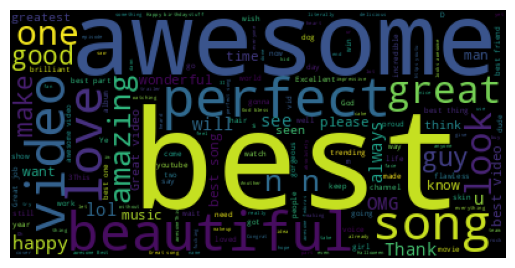

In [45]:
plt.imshow(wordcloud_positive)
plt.axis("off")

In [46]:
negative_string = ''.join(negative_words["comment_text"])
negative_string

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!Well… The brain surgeon Ben Carson just proved how truly insane he is…WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!WTF BRUH!!!!!!cheeseus christ thats insane!!!this is the worst thing i've heard. ever.Economy is horrible in Cuba. It's going to be years before they get out of this.Sub to me if this is terriblePATHETICI don't like this sportscaster  sounds very annoyingcommentators are awfulThis tv show became trump witch hunt tube... and frankly, boring.Arpaio should be arrested again for horribly butchering that song.This  show has become one-noted and pathetic.HARD CANDY!!!!!!!!!!!Tired of the philosophy add !!!!!!!boring0:22   **laughs at terrible pun**Why is media even covering this disgusting woman anymore?How is this trending ? Awfula horrible attempt to try and get us to freak outthis is one of the worst videos I've ever seenWhats with the horrible music? tfShe is the worst.Boringbori

In [47]:
wordcloud_negative = WordCloud(stopwords=stopwords).generate(negative_string)

(-0.5, 399.5, 199.5, -0.5)

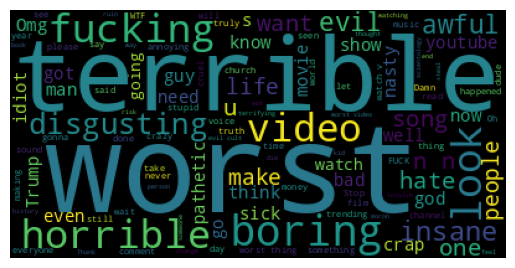

In [49]:
plt.imshow(wordcloud_negative)
plt.axis('off')

## Emoji Analysis



In [62]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=ef6fdeef002b42b9ecfc9cfcecb280a3284a87b051d17a70d3f25eb933e5d8d1
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [65]:
import emoji

In [66]:
emoji_list = []
for comment in comments["comment_text"].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      emoji_list.append(char)

In [73]:
from collections import Counter
emoji10 = Counter(emoji_list).most_common(10)

In [74]:
emoji1 = []
for i in range(10):
  emoji1.append(emoji10[i][0])

In [76]:
emoji_values = []
for i in range(10):
  emoji_values.append(emoji10[i][1])

In [78]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [81]:
bar = go.Bar(x = emoji1, y = emoji_values)

### The plot below shows the Top 10 most used Emojis.


In [82]:
iplot([bar])

### Importing all the dataset in one go

In [83]:
import os

In [90]:
file_csv = os.listdir(r"/content/additional_data")

In [93]:
path = r"/content/additional_data"

In [91]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [95]:
full_df = pd.DataFrame()

for file in file_csv:
  current_df = pd.read_csv(path + '/'+ file, encoding = 'iso-8859-1', error_bad_lines = False)

  full_df = pd.concat([full_df, current_df], ignore_index = True)

In [97]:
full_df.shape

(375942, 16)

### lets look if the data has any duplicate rows or not

In [100]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [101]:
full_df = full_df.drop_duplicates()

In [102]:
full_df.shape

(339525, 16)

### Exporting the Data

In [103]:
# full_df.to_csv(r"/content/additional_data", index = False)

### Lets Find out which category has the maximum likes

In [104]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [105]:
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [108]:
json_df = pd.read_json(r"/content/US_category_id.json")
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


### we need to extract the names of the category from the items column which contains dictionary.

In [110]:
json_df["items"].head()

0    {'kind': 'youtube#videoCategory', 'etag': '"m2...
1    {'kind': 'youtube#videoCategory', 'etag': '"m2...
2    {'kind': 'youtube#videoCategory', 'etag': '"m2...
3    {'kind': 'youtube#videoCategory', 'etag': '"m2...
4    {'kind': 'youtube#videoCategory', 'etag': '"m2...
Name: items, dtype: object

In [111]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [112]:
json_df["items"][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [118]:
cat_dict = {}

for item in json_df["items"].values:
  cat_dict[int(item["id"])] = item["snippet"]["title"]

In [120]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [125]:
full_df["category_name"] = full_df["category_id"].map(cat_dict)
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,categoty_name,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,Music


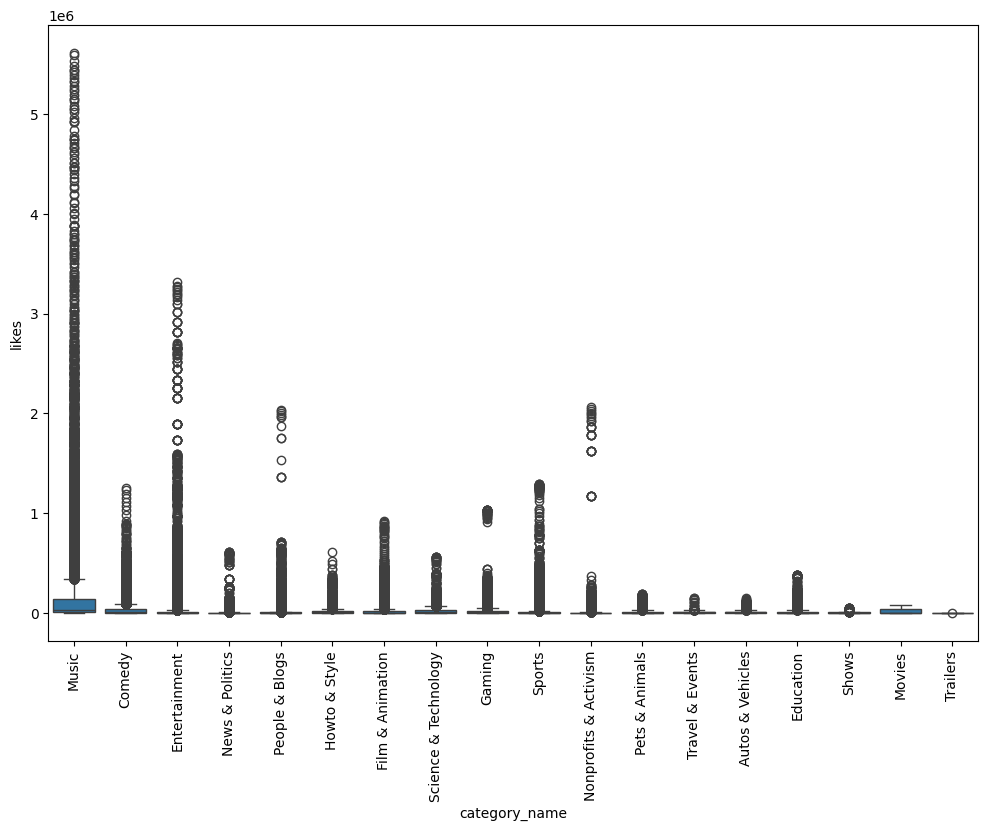

In [131]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "category_name", y = "likes", data=full_df)
plt.xticks(rotation = 'vertical')
plt.show()

### Lets find out whether audience is engaged or not


In [128]:
full_df["like_rate"] = (full_df["likes"] / full_df["views"]) * 100
full_df["dislike_rate"] = (full_df["dislikes"] / full_df["views"]) * 100
full_df["comment_rate"] = (full_df["comment_count"] / full_df["views"]) * 100

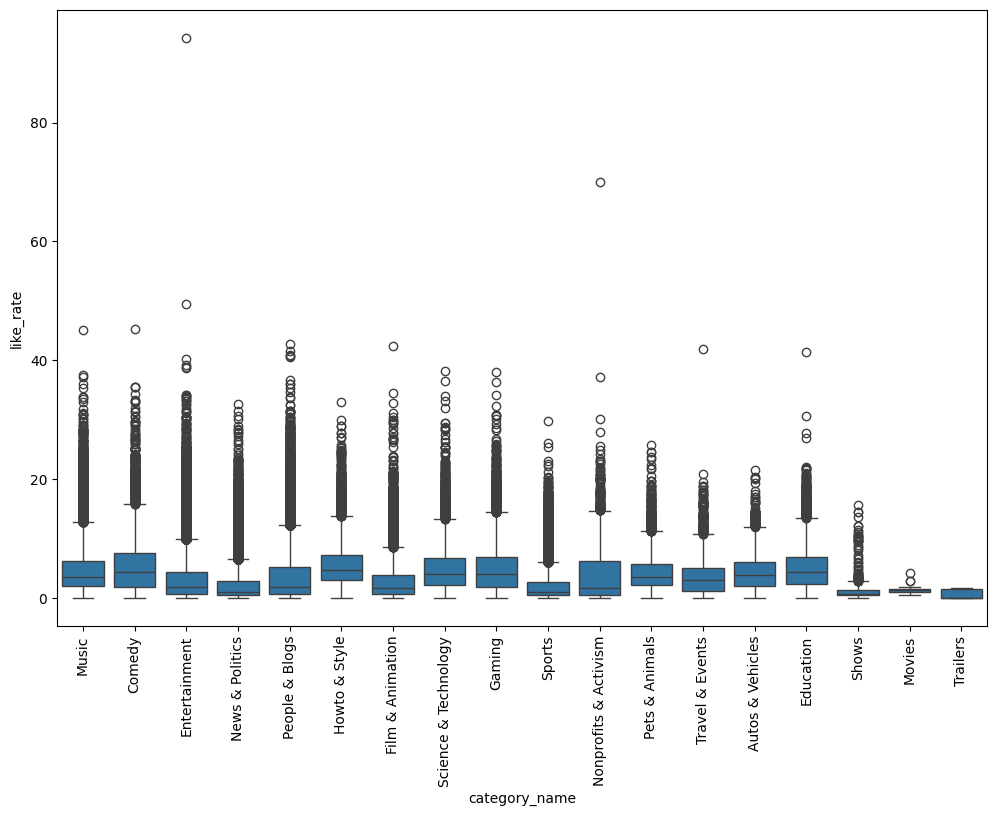

In [130]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "category_name", y = "like_rate", data= full_df)
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='views', ylabel='likes'>

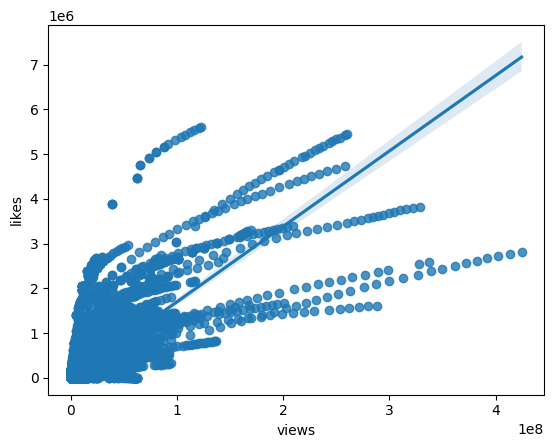

In [132]:
sns.regplot(x = "views", y = "likes", data = full_df)

In [135]:
correlation = full_df[["views", "likes", "dislikes"]].corr()
correlation

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

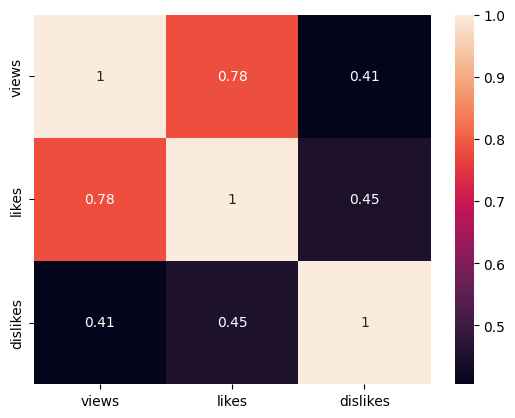

In [137]:
sns.heatmap(correlation, annot = True)

### Lets find out which channels have the largest number of trending videos

In [138]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,categoty_name,category_name,like_rate,dislike_rate,comment_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,Music,4.874563,0.062887,0.253752


In [139]:
full_df["channel_title"].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ROME REPORTS en EspaÃ±ol                1
Lylo cyv                                1
maraqli tv                              1
EdaHDTelevision                         1
Mrs Flury                               1
Name: channel_title, Length: 37824, dtype: int64

In [165]:
trending_videos = full_df.groupby(["channel_title"]).size().sort_values(ascending = False).reset_index()
trending_videos = trending_videos.rename(columns = {0: 'total_videos'})
trending_videos

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [166]:
import plotly.express as px
px.bar( data_frame = trending_videos[0:10], x = "channel_title", y = "total_videos")

### Lets find out most liked channels

In [167]:
most_liked_channels = full_df.groupby("channel_title")["likes"].sum().sort_values(ascending=False).reset_index()
most_liked_channels = most_liked_channels.rename(columns = {'likes': 'total_likes'})

In [168]:
px.bar( data_frame = most_liked_channels[0:10], x = "channel_title", y = "total_likes")

### lets find out the most viewed channels

In [169]:
most_viewed_channels = full_df.groupby("channel_title")["views"].sum().sort_values(ascending=False).reset_index()
most_viewed_channels = most_viewed_channels.rename(columns = {'views': 'total_views'})

In [170]:
px.bar( data_frame = most_viewed_channels[0:10], x = "channel_title", y = "total_views")

### Does punctuations intitle and tags have any relation with views, likes, dislike and comments?

In [171]:
import string

In [172]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [187]:
def punc_count(text):
  return len([char for char in text if char in string.punctuation])

In [189]:
full_df["count_punc"] = full_df["title"].apply(punc_count)

<Axes: xlabel='count_punc', ylabel='views'>

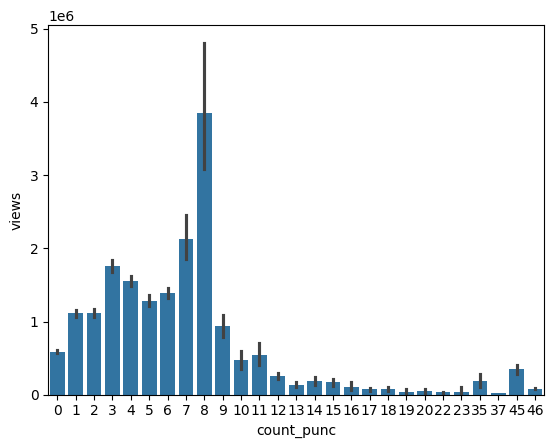

In [202]:
sns.barplot( x = "count_punc",y = "views" , data = full_df)

<Axes: xlabel='count_punc', ylabel='likes'>

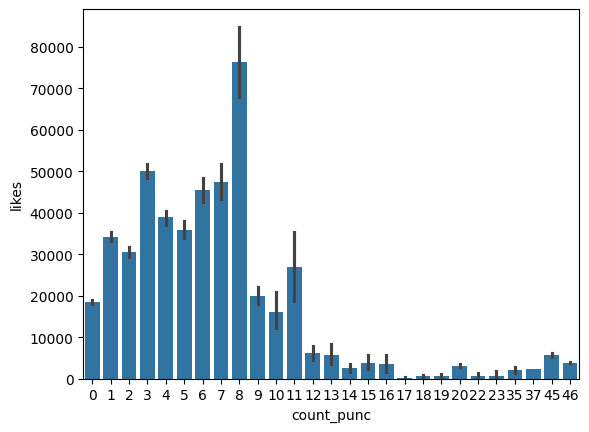

In [199]:
sns.barplot(y = "likes", x = "count_punc", data = full_df)

<Axes: xlabel='count_punc', ylabel='dislikes'>

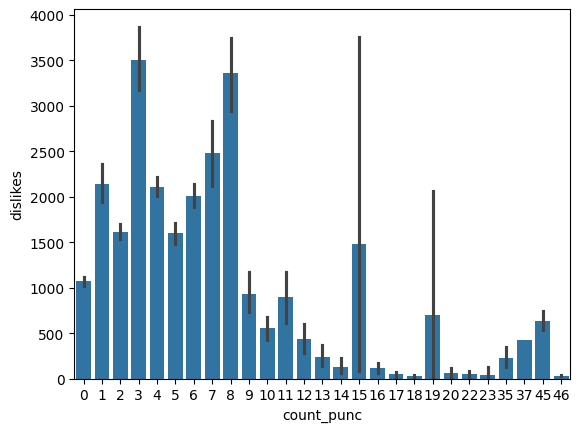

In [200]:
sns.barplot(y = "dislikes", x = "count_punc", data = full_df)